## Importing Libraries

In [2]:
import cv2
import numpy as np
from PIL import Image
import scipy.signal as sig
from matplotlib import pyplot as plt

#### Opening Image

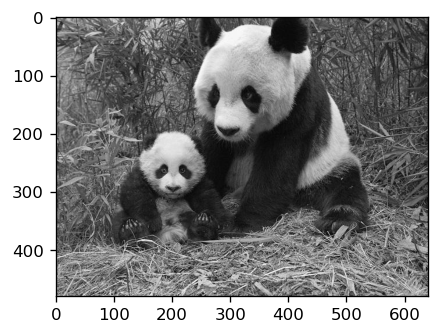

In [10]:
img = Image.open("p3.jpg")
img.mode
img = np.asarray(img)
plt.figure(dpi=120,figsize=(4,4))
plt.imshow(img,cmap='gray');

#### Part 1, DFT

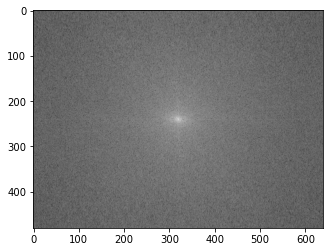

In [161]:
F = np.fft.fftshift(np.fft.fft2(img))
plt.imshow(20*np.log10(np.abs(F)),cmap='gray');

#### Part 2, Sf

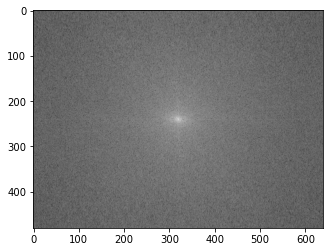

In [165]:
Sf = np.abs(F**2)
plt.imshow(20*np.log10(np.abs(Sf)),cmap='gray');

#### Part 3, corrupted

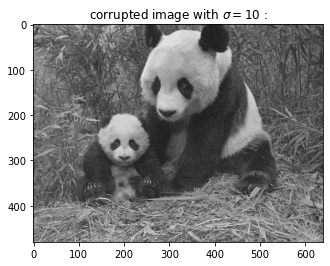

In [152]:
sigma = 10
noise = np.random.normal(0,sigma,img.shape)
#print(noise.shape, noise.dtype, np.max(noise))
corrupted = img + noise
corrupted = (corrupted-np.min(corrupted))*255/(np.max(corrupted)-np.min(corrupted))
corrupted_fft = np.fft.fftshift(np.fft.fft2(corrupted))

plt.title('corrupted image with $\sigma = 10$ :')
plt.imshow(corrupted,cmap='gray');

#### Part 4, Wiener Filter

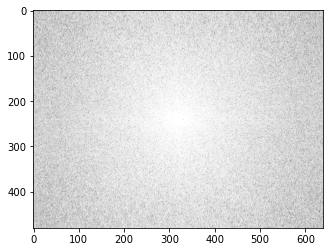

In [196]:
#print(np.max(Sf))
N = np.mean(Sf)/sigma**2/10

Wiener = 1/(1 + N*sigma**2/Sf)

plt.imshow(20*np.log10(np.abs(Wiener)),cmap='gray');

##### N should be a number around 0.2 or so and if it is less than 0.01 then no noise would recover and if it is more than 10 then the image would completely fade away, so N ≈ mean(Sf)/sigma**2 (however in theory N is equal to this)

#### Part 5, F_hat

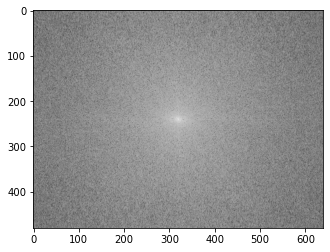

In [191]:
F_hat = corrupted_fft*Wiener
plt.imshow(20*np.log10(np.abs(F_hat)),cmap='gray');

#### Part 6, f_hat

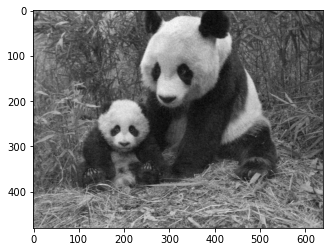

In [192]:
f_hat = np.real(np.fft.ifft2(np.fft.ifftshift(F_hat))).astype('uint8')
plt.imshow(f_hat,cmap='gray');

#### Part 7, point spread function

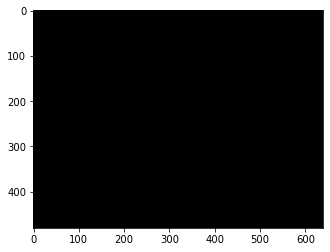

In [197]:
psf = np.real(np.fft.ifft2(np.fft.ifftshift(Wiener)))
plt.imshow((psf),cmap='gray');